# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [64]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


In [29]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?


In [30]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [31]:
fraud.shape

(1000000, 8)

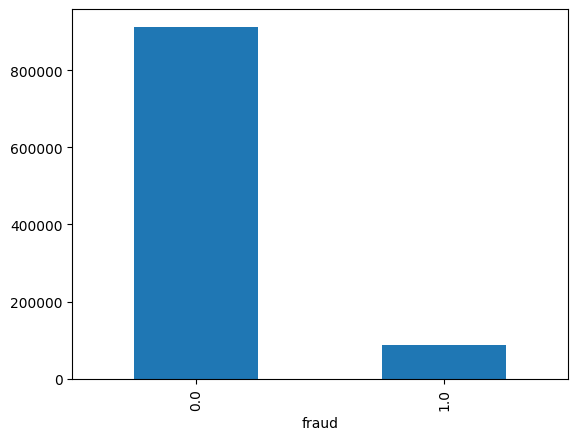

In [32]:
fr = fraud["fraud"].value_counts()
fr.plot(kind="bar")
plt.show()

The distribution of our target seems to be skuwed, it is imbalanced.

- **2.** Train a LogisticRegression.


In [33]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [34]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
log_reg = LogisticRegression()

In [37]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [38]:
log_reg.score(X_test_scaled, y_test)

0.959316

In [39]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228464
         1.0       0.89      0.60      0.72     21536

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 


In [40]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)


In [42]:
train["fraud"] = y_train.values

In [49]:
frauded = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [51]:
oversampled = resample(frauded, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [52]:
train_over = pd.concat([oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
497702,-0.392672,-0.185937,1.018325,-2.727803,-0.733657,-0.334251,0.733339,1.0
486492,5.943239,0.908490,0.073902,0.366595,-0.733657,-0.334251,0.733339,1.0
524539,-0.140815,-0.185760,2.761240,0.366595,1.363034,-0.334251,0.733339,1.0
242403,0.149044,-0.180199,3.850705,0.366595,-0.733657,-0.334251,0.733339,1.0
479009,-0.339389,0.352697,1.702923,0.366595,1.363034,-0.334251,0.733339,1.0
...,...,...,...,...,...,...,...,...
749995,-0.164583,0.114351,-0.275427,0.366595,1.363034,-0.334251,0.733339,0.0
749996,-0.178334,-0.212739,-0.435564,0.366595,-0.733657,-0.334251,-1.363625,0.0
749997,-0.398060,0.079886,-0.520989,-2.727803,-0.733657,2.991763,-1.363625,0.0
749998,-0.164863,-0.162595,-0.283232,0.366595,-0.733657,2.991763,0.733339,0.0


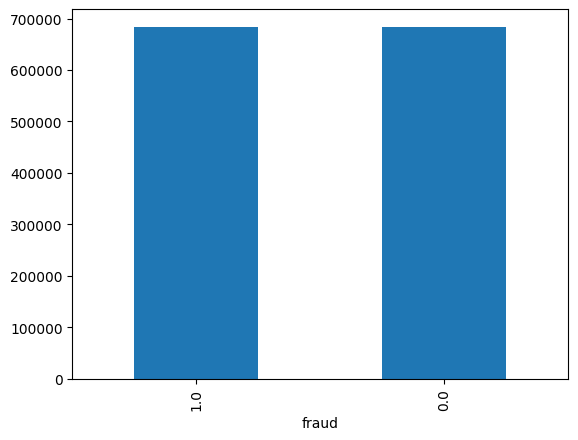

In [53]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [54]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [55]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [56]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    228464
         1.0       0.57      0.95      0.71     21536

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



in some areas there is improvement, but over all no there was no real improvement overall

- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?


In [57]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.202115,-0.039333,-0.053329,0.366595,-0.733657,2.991763,0.733339,0.0
1,-0.380126,-0.198655,-0.387333,0.366595,1.363034,-0.334251,-1.363625,0.0
2,-0.366204,-0.200232,1.669362,0.366595,-0.733657,2.991763,0.733339,0.0
3,-0.297655,0.525582,-0.548459,0.366595,-0.733657,-0.334251,0.733339,0.0
4,-0.226479,-0.205702,-0.333082,0.366595,1.363034,-0.334251,-1.363625,0.0
...,...,...,...,...,...,...,...,...
749995,-0.164583,0.114351,-0.275427,0.366595,1.363034,-0.334251,0.733339,0.0
749996,-0.178334,-0.212739,-0.435564,0.366595,-0.733657,-0.334251,-1.363625,0.0
749997,-0.398060,0.079886,-0.520989,-2.727803,-0.733657,2.991763,-1.363625,0.0
749998,-0.164863,-0.162595,-0.283232,0.366595,-0.733657,2.991763,0.733339,0.0


In [58]:
no_fraud_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(frauded),
                                    random_state=0)
no_fraud_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
480335,-0.391889,-0.212807,0.093051,-2.727803,-0.733657,-0.334251,0.733339,0.0
562569,-0.066290,0.102025,-0.311614,0.366595,-0.733657,-0.334251,-1.363625,0.0
680736,-0.197154,-0.123698,-0.433531,0.366595,-0.733657,-0.334251,0.733339,0.0
617949,-0.398754,1.145561,-0.593449,-2.727803,-0.733657,-0.334251,-1.363625,0.0
98658,0.131634,-0.162500,-0.557736,0.366595,1.363034,-0.334251,0.733339,0.0
...,...,...,...,...,...,...,...,...
235978,-0.296847,-0.175558,-0.240566,0.366595,-0.733657,2.991763,0.733339,0.0
445883,0.189431,0.163682,-0.608142,0.366595,-0.733657,-0.334251,-1.363625,0.0
363385,-0.339859,-0.192158,-0.373811,0.366595,1.363034,-0.334251,-1.363625,0.0
670874,-0.256793,-0.194903,-0.523066,0.366595,1.363034,-0.334251,-1.363625,0.0


In [59]:
train_under = pd.concat([no_fraud_undersampled, frauded])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
480335,-0.391889,-0.212807,0.093051,-2.727803,-0.733657,-0.334251,0.733339,0.0
562569,-0.066290,0.102025,-0.311614,0.366595,-0.733657,-0.334251,-1.363625,0.0
680736,-0.197154,-0.123698,-0.433531,0.366595,-0.733657,-0.334251,0.733339,0.0
617949,-0.398754,1.145561,-0.593449,-2.727803,-0.733657,-0.334251,-1.363625,0.0
98658,0.131634,-0.162500,-0.557736,0.366595,1.363034,-0.334251,0.733339,0.0
...,...,...,...,...,...,...,...,...
749978,-0.329900,-0.203445,0.859822,0.366595,-0.733657,-0.334251,0.733339,1.0
749982,-0.397809,-0.188387,1.768543,-2.727803,-0.733657,-0.334251,0.733339,1.0
749984,-0.310922,-0.014360,2.612235,0.366595,-0.733657,-0.334251,0.733339,1.0
749992,-0.039184,2.041061,1.631019,0.366595,1.363034,-0.334251,0.733339,1.0


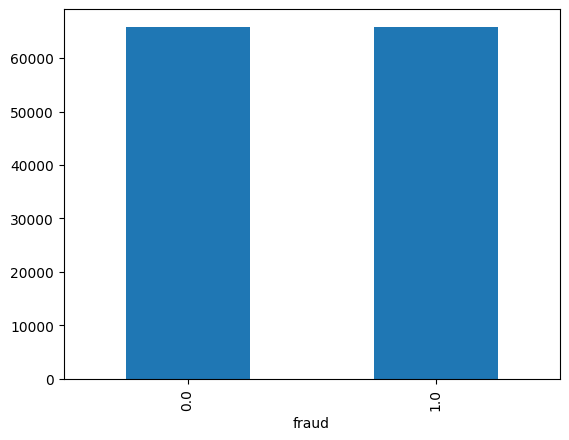

In [60]:
f_plt = train_under["fraud"].value_counts()
f_plt.plot(kind="bar")
plt.show()

In [61]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [62]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [63]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    228464
         1.0       0.57      0.95      0.71     21536

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



got the same results as the other one

- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [65]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [66]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [67]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [68]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    228464
         1.0       0.57      0.95      0.71     21536

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



Same results as the others